<div style="color:white;
            display:fill;
            border-radius:5px;
            background-color:lightsteelblue;
            font-size:80%;
            font-family:Courier New;
            letter-spacing;1px">
    <h1 style='padding:20px;
              color:darkblue;
              text-align:center;'>
        How to Choose the Right Chart for your Data
    </h1>
    </div>

Data visualization is an essential tool for any data-driven organization, allowing users to make sense of complex data sets and communicate insights to stakeholders effectively. However, with so many chart types to choose from, it can be challenging to decide which one to use for a given set of data.  
  
Before selecting a chart type, it's important to identify the type of data you're working with. Data can be categorized into one of four types: **quantitative**, **categorical**, **temporal**, or **spatial**.
**Quantitative** data refers to numerical values, such as sales figures or inventory levels.   
   
**Categorical** data, on the other hand, refers to non-numerical values, such as product categories or customer segments. **Temporal** data refers to time-based data, such as monthly sales figures or hourly website traffic. Finally, **spatial** data refers to location-based data, such as customer addresses or store locations.

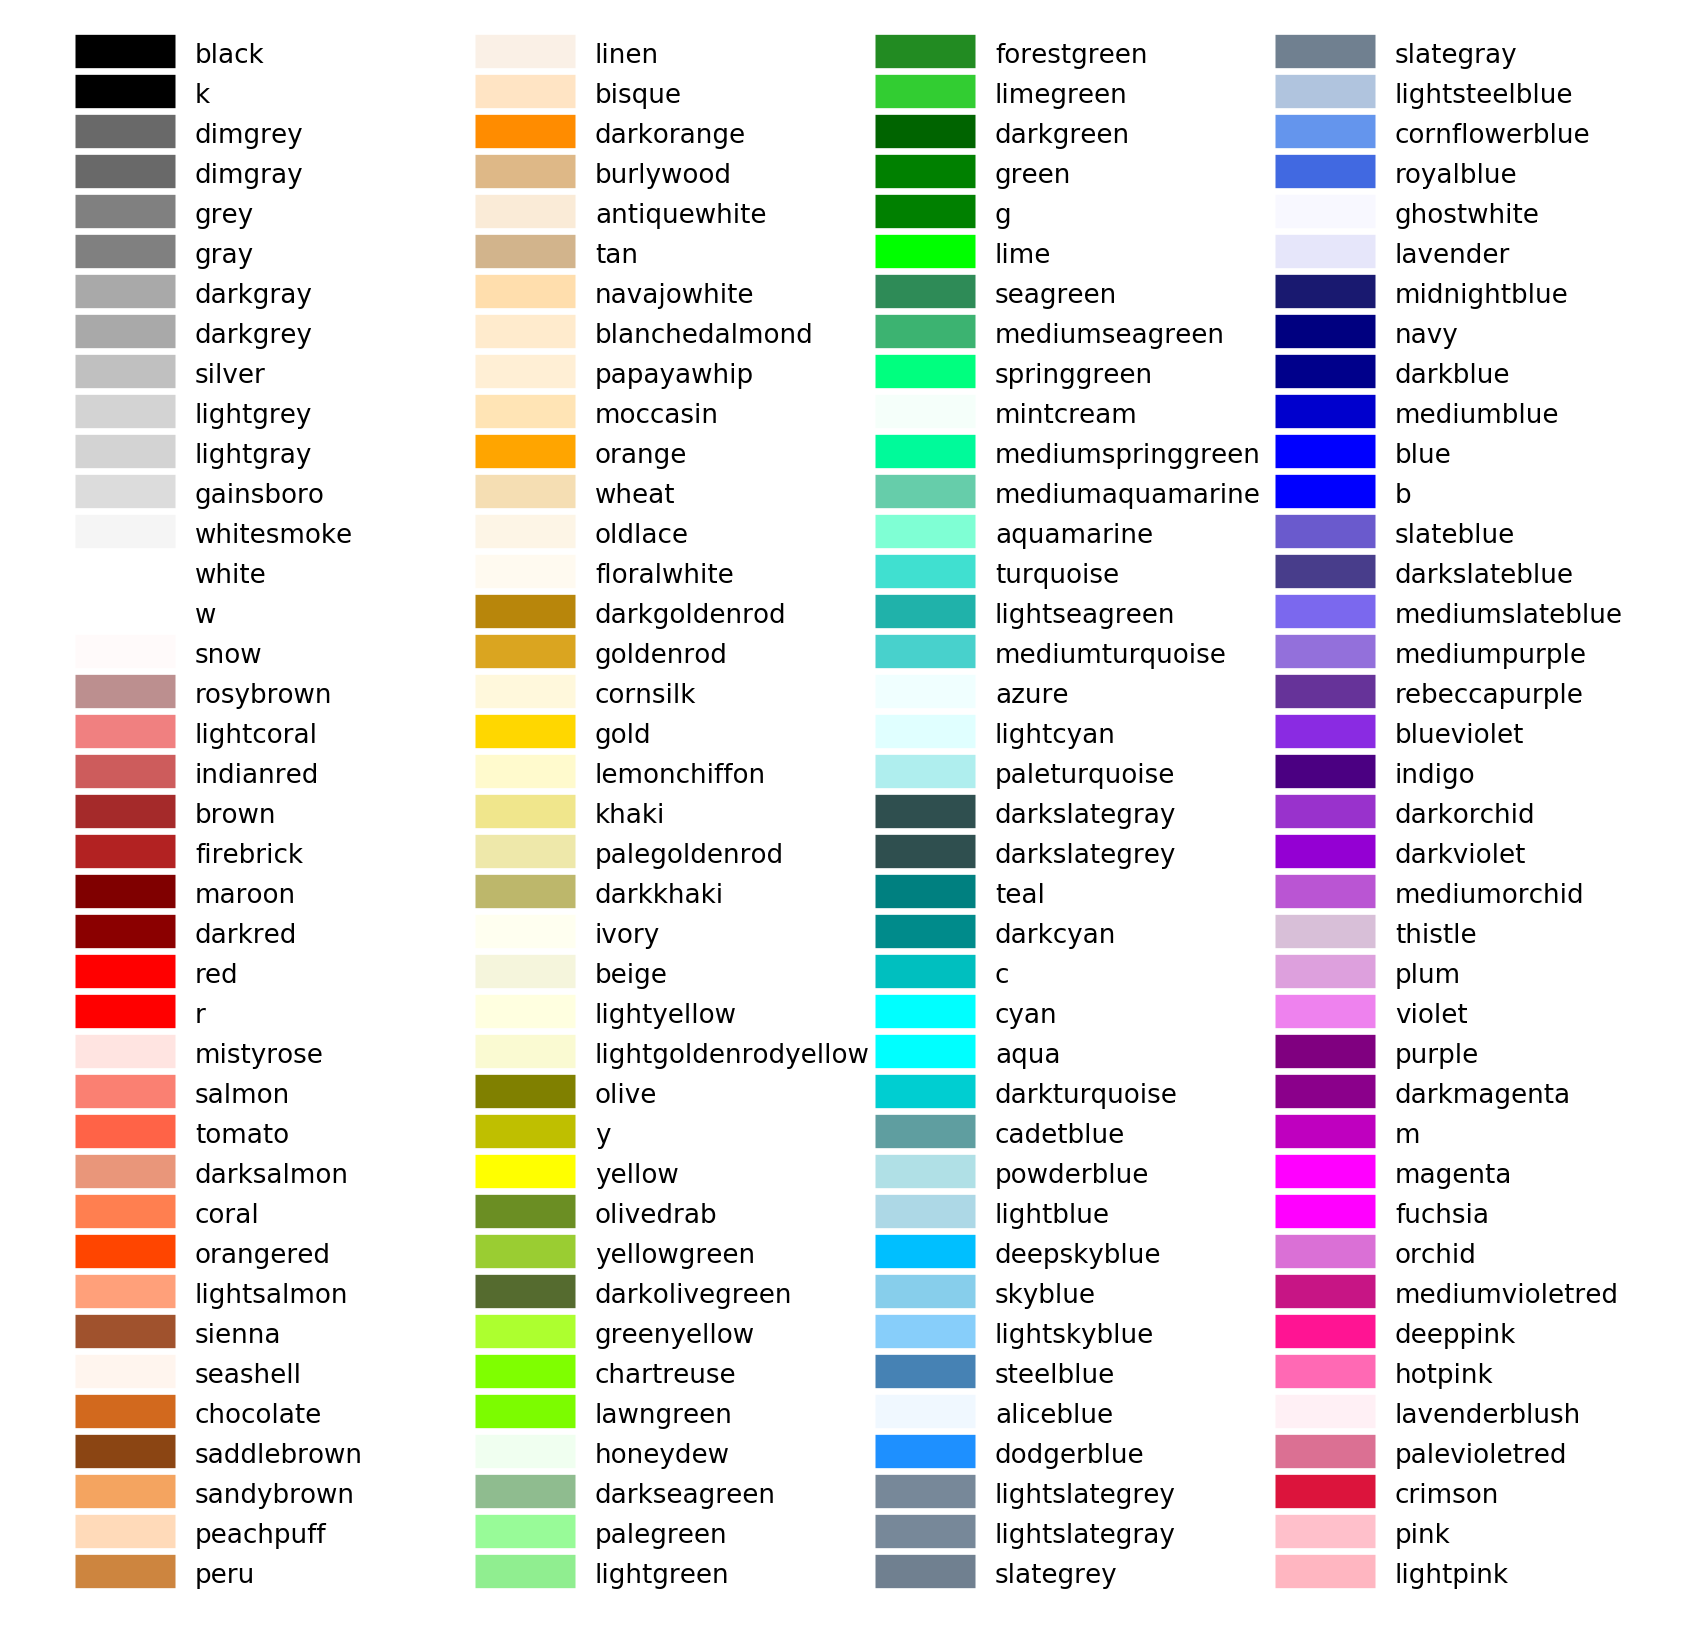

# <a id='toc1_'></a>[Importing Neccessary Libraries](#toc0_)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_context('notebook')
sns.set(style="ticks", context="talk")

titanic = sns.load_dataset('titanic')
plt.style.use('dark_background')
sns.set_style("darkgrid")

In [2]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# <a id='toc2_'></a>[What is the best chart to show **comparison**?](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [Importing Neccessary Libraries](#toc1_)    
- [What is the best chart to show **comparison**?](#toc2_)    
  - [Column Chart](#toc2_1_)    
  - [Grouped Column](#toc2_2_)    
  - [Bar Chart](#toc2_3_)    
  - [Line Chart](#toc2_4_)    
- [What is the best chart to show **distribution**?](#toc3_)    
  - [Box Plot](#toc3_1_)    
  - [Histogram](#toc3_2_)    
  - [Scatter Plot](#toc3_3_)    
- [What is the best chart to show **composition**?](#toc4_)    
  - [Donut Chart](#toc4_1_)    
  - [Pie Chart](#toc4_2_)    
  - [Stacked Bar](#toc4_3_)    
  - [Stacked Percent](#toc4_4_)    
- [What's the best chart to show a **relationship** between values?](#toc5_)    
  - [Bubble Chart](#toc5_1_)    
  - [Heat Map](#toc5_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

`Raw data are complex to understand, so we need to figure out a way to make it digestible. And, this is where a comparative chart comes to play. This category refers to the comparison of multiple variables or multiple categories within a single variable. When comparing information it is fundamental to pick a chart that will make it easier to understand the differences.`

## <a id='toc2_1_'></a>[Column Chart](#toc0_)

<div class="alert alert-block alert-info">
<b>Info:</b>
Comparisons with fewer categories and short names.
</div>

In [3]:
barplot = titanic.groupby('sex')['survived'].count().reset_index()

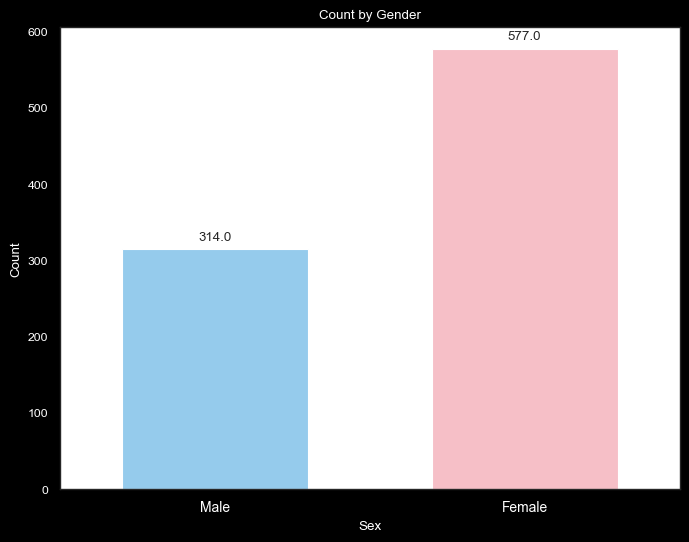

In [4]:
plt.style.use('dark_background')
plt.figure(figsize=(8,6))
sns.set_theme('paper')
sns.set_style('white')
bar = sns.barplot(barplot, x='sex', y='survived', palette=['lightskyblue', 'lightpink'], ci=None, width=0.6)

plt.xticks([0,1], ['Male', 'Female'], fontsize=10, color='white')
plt.yticks(color='white')
for i in bar.patches:
    bar.annotate(format(i.get_height(), '.1f'),
                 (i.get_x() + i.get_width() / 2., i.get_height()),
                 ha = 'center', va = 'center',
                 xytext = (0,9),
                 textcoords = 'offset points')

plt.xlabel('Sex', color='white')
plt.ylabel('Count', color='white')
plt.title('Count by Gender', color='white')
plt.show()

<div class="alert alert-block alert-success">
<b>Uses:</b><br/>
1. You have a data in discrete categories that are small in number or have a single value. <br/>
2. You want to compare values of different categories, visualize proportions, highlight differences, and show trends.  <br/>
3. Your goal is to make information easy for people to understand.
</div>

<div class="alert alert-block alert-danger">
<b>Limitations:</b> <br/>
1. Not ideal for large data sets: Column Charts are a good fit for a maximum of 10-12 datasets. <br/>
2. Not ideal for time intervals
</div>

## <a id='toc2_2_'></a>[Grouped Column](#toc0_)

<div class="alert alert-block alert-info">
<b>Info:</b>
Direct comparison of multiple data series per category.  
In a grouped column chart, it becomes more difficult to compare a single series across categories.
</div>

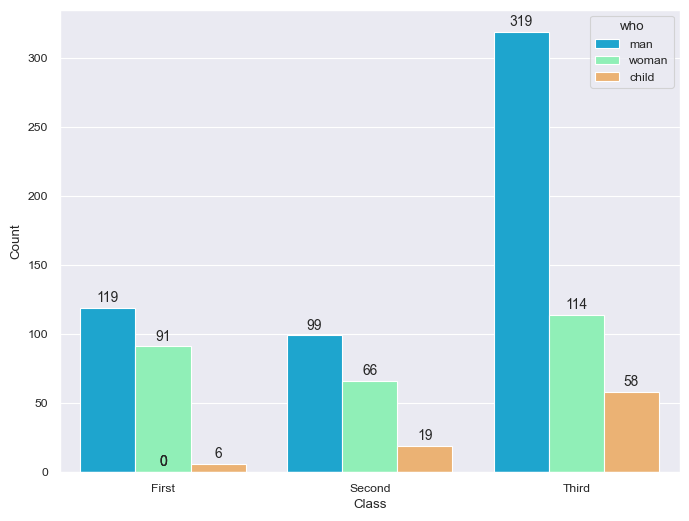

In [5]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,6))
ax = sns.countplot(titanic, x='class', hue='who', palette='rainbow')
for i in ax.patches:
    ax.annotate(format(i.get_height(), '.0f'),
                    (i.get_x() + i.get_width() / 2., i.get_height()),
                    ha = 'center', va = 'center',
                    size = 10,
                    xytext = (0,7),
                    textcoords = 'offset points')
plt.ylabel('Count')
plt.xlabel('Class')
plt.show()

<div class="alert alert-block alert-success">
<b>Uses:</b> <br/>
1. There are multiple groupings. <br/>
2. The goal is to show sizes between individual categories. <br/>
3. The goal is to compare values within a secondary grouping, but not the totals. <br/>
4. The goal is to give a quick overview of something.
</div>

<div class="alert alert-block alert-danger">
<b>Limitations:</b> <br/>
1. Too many columns: clustered column charts can be difficult to read if there are too many columns. <br/>
2. Unevenly distributed data.
</div>

## <a id='toc2_3_'></a>[Bar Chart](#toc0_)

<div class="alert alert-block alert-info">
<b>Info:</b>
Comparisons with a large number of categories, since stacking category names vertically makes them easier to read.   
Bar charts are also great for displaying negative numbers.
</div>

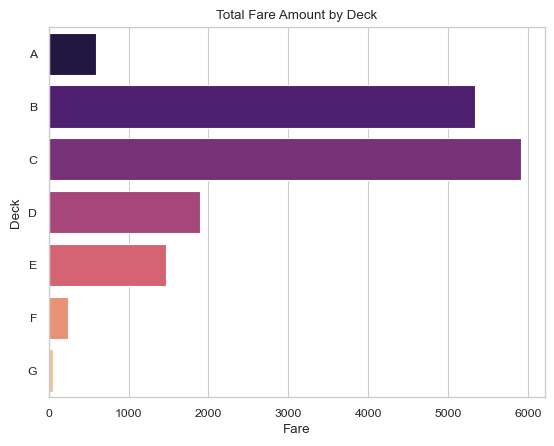

In [6]:
sns.set_theme('paper')
sns.set_style('whitegrid')
bar = titanic.groupby('deck')['fare'].sum().reset_index()
ax = sns.barplot(bar, x='fare', y='deck', palette='magma')
plt.ylabel('Deck')
plt.xlabel('Fare')
plt.title('Total Fare Amount by Deck')
plt.show()

<div class="alert alert-block alert-success">
<b>Uses:</b><br/>
1. Horizontal bar charts are best to compare nominal variables. But number of categories should not exceed 30.<br/>
2. They are better for long category labels, which can overlap in column charts.
</div>

<div class="alert alert-block alert-danger">
<b>Limitations:</b><br/>
1. Proportional representation: bar charts are good for comparing quantities, but they don't always show proportional relationships.<br/>
2. Trends: they don't show how components change over time.
</div>

## <a id='toc2_4_'></a>[Line Chart](#toc0_)

<div class="alert alert-block alert-info">
<b>Info:</b>
Showing trends in continuous data over time with multiple dimensions
</div>

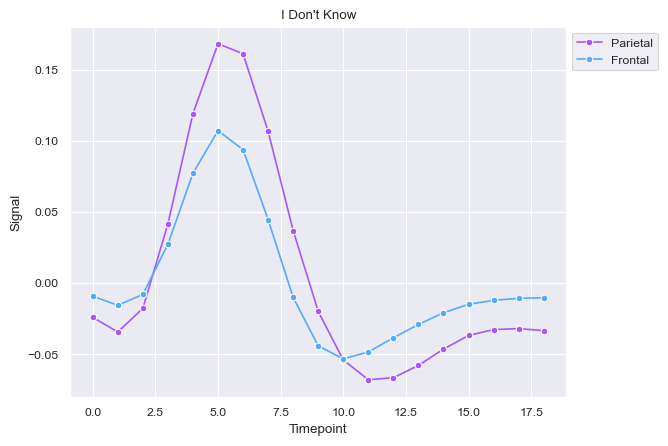

In [7]:
fmri = sns.load_dataset("fmri")
sns.set_style('dark')
sns.set_theme('paper')
ax = sns.lineplot(fmri, x='timepoint', y='signal', hue='region', ci=None, marker='o', palette='cool_r')
plt.xlabel('Timepoint')
plt.ylabel('Signal')
ax.legend(['Parietal', 'Frontal'], bbox_to_anchor=(1.0, 1.0), loc='upper left');
plt.title("I Don't Know")
plt.show()

<div class="alert alert-block alert-success">
<b>Uses:</b><br/>
1. Tracking Changes: line graphs can be used to track changes over short periods of time. They are better to use when smaller changes exist.<br/>
2. Showing how changes affect each other: line charts can show how a change in one variable or number affects changes in another.<br/>
3. Comparing data: line charts can be used to compare data and show trends over time.
</div>

<div class="alert alert-block alert-danger">
<b>Limitations:</b><br/>
1. Clutter: plotting too many lines on the same graph can make it hard to read.<br/>
2. Data types: line charts are limited to data sets that have numerical and whole values. It can be difficult to plot data sets with fractional or decimal values.
</div>

# <a id='toc3_'></a>[What is the best chart to show **distribution**?](#toc0_)

`In statistics, distribution refers to the possibility of the occurrence of an outcome. To understand this, scientists and analysts use charts to represent the frequency distribution of the data and extract conclusions from it. Distribution questions seek to understand how individual data points are distributed within the broader data set`

## <a id='toc3_1_'></a>[Box Plot](#toc0_)

<div class="alert alert-block alert-info">
<b>Info:</b>
Showing how data is distributed based on a five-number statistical summary. A small "box" indicates that most of the data falls within a consistent range, while a larger box indicates the data is more widely distributed.
</div>

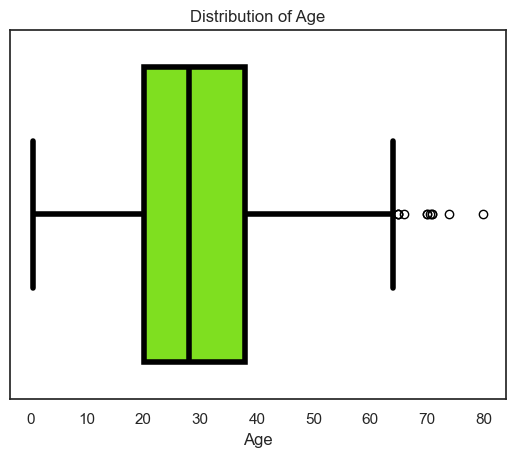

In [8]:
sns.set(style='white')
sns.boxplot(titanic, x='age', color='chartreuse', linewidth=4, linecolor='black')
plt.xlabel('Age')
plt.title('Distribution of Age')
plt.show()

<div class="alert alert-block alert-success">
<b>Uses:</b><br/>
1. Organizes data: boxplots can organize large amounts of data.<br/>
2. Visualized outliers: boxplots can visualize outlier values.<br/>
3. Simple visualization.
</b>

<div class="alert alert-block alert-danger">
<b>Limitations:</b><br/>
1. Summarizes data: boxplots summarize data, which means they lose some information.<br/>
2. Data density: boxplots can't show the detailed shape of the distribution.<br/>
3. Data gaps: boxplots aren't helpful for plotting datasets with two or more peaks or showing data gaps within the interquartile range.<br/>
4. Original data: boxplots often don't clearly show the original data.<br/>
5. Mean, mode, and mean absolute deviation: boxplots can't determine these measures.
</div>

## <a id='toc3_2_'></a>[Histogram](#toc0_)

<div class="alert alert-block alert-info">
<b>Info:</b>
Showing distribution of variables, plotting quantitative data, and identifying the frequency of something occurring within a bucketed range of values. This differs from a column chart because histograms have quantitative data on both axes, rather than relating info about categories.
</div>

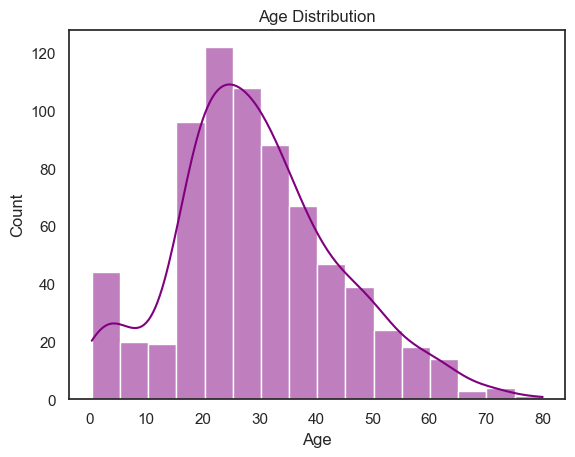

In [9]:
# alpha - transparency
# kde - line plot
# bins - number of bins
sns.histplot(titanic, x='age', color='purple', kde=True, alpha=0.5, bins=16)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<div class="alert alert-block alert-success">
<b>Uses:</b><br/>
1. Simplicity and vesatility: histograms can be used in many different situations to offer an insightful look at frequency distribution.<br/>
2. Understanding the shape of continuous numerical datasets.<br/>
3. Identifying different data, the frequency of data occurring in datasets, intervals of metrics values, and categories. <br/>
4. Seeing flow of data more clearly.
</b>

<div class="alert alert-block alert-danger">
<b>Cons:</b><br/>
1. Difficulty comparing two datasets.<br/>
2. Less suitable for detailed analysis or comparison of multiple datasets.<br/>
3. Caan be difficult to interpret and communicate, especially for non-technical audiences.<br/>
4. Don't allow to detect relevant values.
</div>

## <a id='toc3_3_'></a>[Scatter Plot](#toc0_)

<div class="alert alert-block alert-info">
<b>Info:</b>
Showing how data is distributed with two variables, especially good for large data sets; quickly identifying specific data points that are outliers.

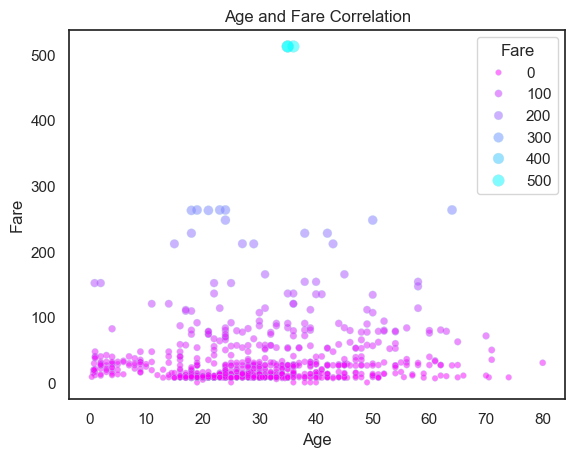

In [10]:
sns.scatterplot(titanic, x='age', y='fare', palette='cool_r', edgecolor='lightblue', alpha=0.5, hue='fare', size='fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age and Fare Correlation')
plt.legend(title='Fare')
plt.show()

<div class="alert alert-block alert-success">
<b>Uses:</b><br/>
1. Displaying measurements: scatterplot is often used in science to present measurements of two or more related variables.<br/>
2. Testing theories: scatterplot can be used to test a theory that two variables are related.<br/>
3. Observing relationships: a scatterplot can be used to display the relationship between two variables and observe the nature of that relationship.<br/>
4. Identifying relationships: a scatterplot can be used to identify a possible relationship between changes osberved in two different sets of variables.<br/>
5. Displaying relationships: a scatterplot can be used to display the strength, direction and form of the relatioship between 2 quantitative variables
</div>

<div class="alert alert-block alert-danger">
<b>Limitations:</b><br/>
1. Associations between more than 2 variables: scatterplots can't show the relationship bwtween more than two variables.
2. Extent of association: scatterplots can't provide the exact extent of association.<br/>
3. Quantitative measure: scatterplots don't indicate the quantitative measure of hte relationship between two variables.
4. Clutter: scatterplots can become cluttered and difficult to interpret if there are too many data points.<br/>
5. Complexity: scatterplots may not fully capture the complexity of the data.<br/>
6. Strength of association: scatterplots can't tell you how strong the association is.<br/>
7. Interpretation: interpretation can be subjective.<br/>
8. Data Type: data on both axes have to be continuous data.<br/>
9. Correlation vs causation: correlation does not mean and not show causation.
</div>

<div class="alert alert-block alert-warning">
<b>Interpretation:</b><br/>
1. If the data show an uphill pattern as you move from left to right, this indicates a positive relationship between X and Y. As the X-values increase (move right), the Y-values tend to increase (move up).<br/>
2. If the data show a downhill pattern as you move from left to right, this indicates a negative relationship between X and Y. As the X-values increase (move right) the Y-values tend to decrease (move down).<br/>
3. If the data don’t seem to resemble any kind of pattern (even a vague one), then no relationship exists between X and Y.
</div>

# <a id='toc4_'></a>[What is the best chart to show **composition**?](#toc0_)

`The purpose of business graphs and charts for composition is to compare parts to a whole in absolute numbers and normalized forms, usually a percentage. It is one of the most common and traditionally used visualization categories and it is usually limited by the simplicity of the chart types. Composition questions ask what general features are present in the data set.`

## <a id='toc4_1_'></a>[Donut Chart](#toc0_)

<div class="alert alert-block alert-info">
<b>Info:</b>
Examining part-to-whole relationships when simple proportions provide meaningful info and pivots for multiple categories are needed.
</div>

In [11]:
donut = titanic.groupby('class')['alive'].count().reset_index()

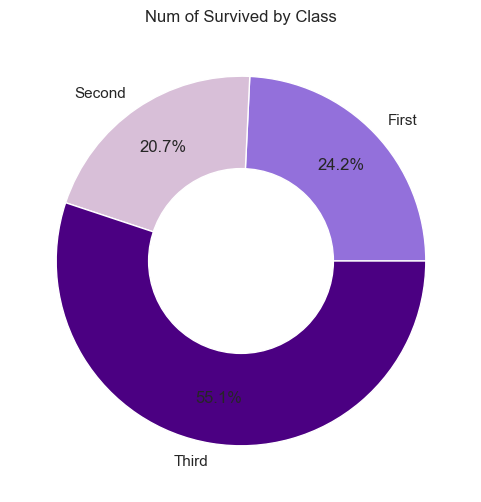

In [12]:
plt.figure(figsize=(6,6))
names=donut['class']
plt.pie(donut['alive'], labels=names, autopct='%1.1f%%', pctdistance=0.75, 
        colors=['mediumpurple', 'thistle', 'indigo'],
        wedgeprops = {"linewidth": 1, "edgecolor": "white"})
circle = plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Num of Survived by Class')

plt.show()

<div class="alert alert-block alert-success">
<b>Uses:</b><br/>
1. Can be used to different data points that total 100%.<br/>
2. Can be used when you have less than 5 categories in a single dataset.<br/>
3. Can be blended with numbers, words, colors, and subtle images.
</div>

<div class="alert alert-block alert-danger">
<b>Limitations:</b><br/>
1. Limited data categories.<br/>
2. Less effective for time-series data.<br/>
3. Limited interactivity.<br/>
4. Risk of misinterpretation.<br/>
5. Not suitable for constantly changing data.<br/>
6. Negative data cannot be identified iunless marked.
</div>

## <a id='toc4_2_'></a>[Pie Chart](#toc0_)

<div class="alert alert-block alert-info">
<b>Info:</b>
Examining part_to whole relationships when simple proportions provide meaningful information.
</div>

In [13]:
pie = titanic.groupby('deck')['alive'].count().reset_index()

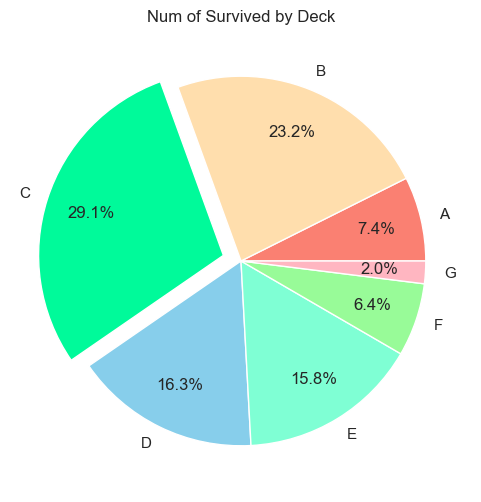

In [14]:
plt.figure(figsize=(6,6))
names = pie['deck']
explode = [0,0,0.1,0,0,0,0]
plt.pie(pie['alive'], labels=names, autopct='%1.1f%%', pctdistance=0.75,
        colors=['salmon', 'navajowhite', 'mediumspringgreen', 'skyblue', 'aquamarine', 'palegreen', 'lightpink'],
        explode = explode)
plt.title('Num of Survived by Deck')
plt.show()

<div class="alert alert-block alert-success">
<b>Uses:</b><br/>
1. Easy to read and interpret.<br/>
2. Clear and concise.<br/>
3. Simple and easy-to-understand.<br/>
4. Display multiple classes of data in one chart.<br/>
5. More visually appealing than other graphs.<br/>
6. Requires little explanation
</div>

<div class="alert alert-block alert-danger">
<b>Limitations:</b><br/>
1. Don't reveal exact values.<br/>
2. Can only display one variable at a time.<br/>
3. Become less effective if they use too many pieces of data.<br/>
4. Don't show changes over time.<br/>
5. Can give false impressions if not proportional.<br/>
6. Hard to read exact data values.<br/>
7. Many pies needed to show changes over time.
</div>

## <a id='toc4_3_'></a>[Stacked Bar](#toc0_)

<div class="alert alert-block alert-info">
<b>Info:</b>
Showing an overview of the composition of data among many categories, or when working with time.
</div>

In [15]:
tips = sns.load_dataset('tips')

In [16]:
total = tips.groupby('day')['total_bill'].sum().reset_index()
smoker = tips[tips.smoker == 'Yes']

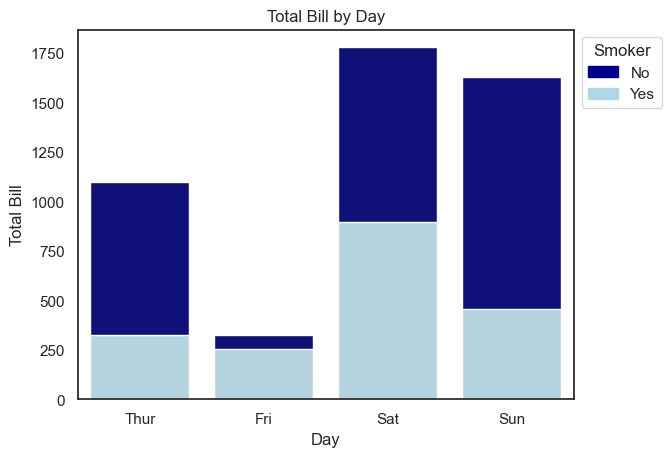

In [17]:
import matplotlib.patches as mpatches

bar1 = sns.barplot(total, x='day', y='total_bill', color='darkblue')
bar2 = sns.barplot(smoker, x='day', y='total_bill', estimator='sum', ci=None, color='lightblue')

top_bar = mpatches.Patch(color='darkblue', label='smoker = No')
bottom_bar = mpatches.Patch(color='lightblue', label='smoker = Yes')
plt.ylabel("Total Bill")
plt.xlabel("Day")
plt.title("Total Bill by Day")
plt.legend(handles=[top_bar, bottom_bar], bbox_to_anchor=(1.0, 1.0), title='Smoker', labels=['No', 'Yes'])
plt.show()

<div class="alert alert-block alert-success">
<b>Uses:</b><br/>
1. Easy to understand: stacked bar charts can help you quickly comprehend data.<br/>
2. Compare total bar lengths: stacked bar charts make it easy to compare the total length of each bar.<br/>
3. Show how a category is divided: Stacked bar charts can show how a larger category is divided into smaller subcategories.<br/>
4. Consistency: Stacked bar charts can be easier to read if each primary bar is stacked in the same order.
</div>

<div class="alert alert-block alert-danger">
<b>Limitations:</b><br/>
1. Difficult to read: Stacked bar charts can be difficult to read, especially as the number of segments in each bar increases.<br/>
2. Compare relative sizes: It can be difficult to compare the relative size of the components that make up each bar, except for the first series of data.<br/>
3. Visually complex: Stacked bar charts can become visually complex as categories and data series are added.<br/>
4. Confuse users: Using the wrong chart type for your data can confuse users and lead them to make bad decisions.<br/>
5. Compare widths: It can be difficult to judge the exact widths of any subsequent strips, or to compare the widths of two strips.
</div>

## <a id='toc4_4_'></a>[Stacked Percent](#toc0_)

<div class="alert alert-block alert-info">
<b>Info:</b>
Times when the pure composition of data is the message you want to deliver and exact values aren't necessary. This chart also works well when comparing the proportional contribution of different categories.
</div>

In [18]:
smoker = tips[tips.smoker=='Yes'].groupby('day')['total_bill'].sum().reset_index()
smoker['total_bill'] = [i / j * 100 for i,j in zip(smoker['total_bill'], total['total_bill'])]
total['total_bill'] = [i / j * 100 for i,j in zip(total['total_bill'], total['total_bill'])]

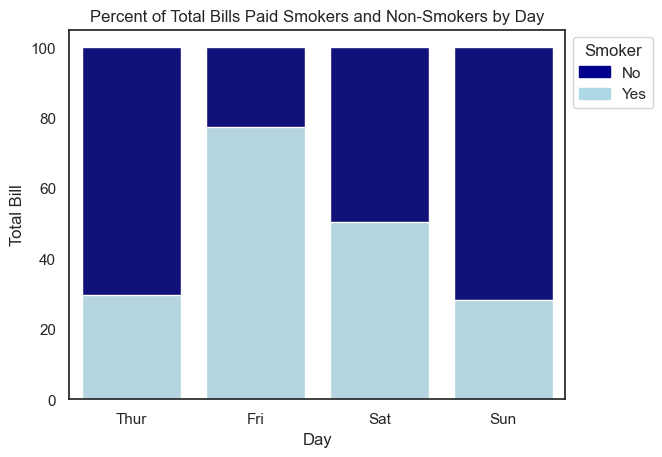

In [19]:
bar1 = sns.barplot(x="day",  y="total_bill", data=total, color='darkblue')
bar2 = sns.barplot(x="day", y="total_bill", data=smoker, color='lightblue')

top_bar = mpatches.Patch(color='darkblue', label='smoker = No')
bottom_bar = mpatches.Patch(color='lightblue', label='smoker = Yes')
plt.legend(handles=[top_bar, bottom_bar], bbox_to_anchor=(1.0, 1.0), title='Smoker', labels=['No', 'Yes'])
plt.title("Percent of Total Bills Paid Smokers and Non-Smokers by Day")
plt.ylabel("Total Bill")
plt.xlabel("Day")
plt.show()

<div class="alert alert-block alert-success">
<b>Uses:</b><br/>
1. Save time: Stacked bar charts can help you easily comprehend data.<br/>
2. Compare total bar lengths: Stacked bar charts make it easy to compare total bar lengths.<br/>
3. Easy to find data points: As with nearly all interactive graphs, the use of marker labels is not necessary and helps make the display less cluttered.
</div>

<div class="alert alert-block alert-danger">
<b>Limitations:</b><br/>
1. Harder to read: Stacked bar charts can become harder to read the more segments each bar has.<br/>
2. Visually complex: As categories or data series are added, stacked column charts quickly become visually complex.<br/>
3. Harder to analyze primary category totals: In a percentage stacked bar chart, each bar is scaled to 100 percent, so every bar on the chart has the same height. This makes it more difficult to analyze the primary category totals.<br/>
4. Poor precision: Stacked bars can have the air of precision, when they're really poor.
</b>

# <a id='toc5_'></a>[What's the best chart to show a **relationship** between values?](#toc0_)

`Understanding connections between different data points can significantly help discover new relevant insights. Questions in this category ask how values and attributes relate to each other.`

## <a id='toc5_1_'></a>[Bubble Chart](#toc0_)

<div class="alert alert-block alert-info">
<b>Info:</b>
Showing the relationship between data points with three variables.
</div>

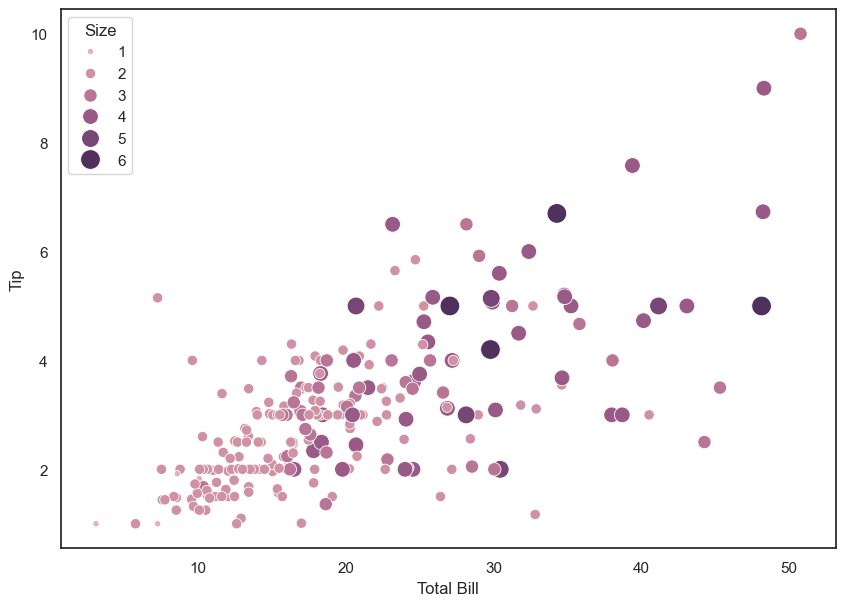

In [20]:
plt.figure(figsize=(10,7))
sns.scatterplot(tips, x='total_bill', y='tip', hue='size', size='size', sizes=(20,200), hue_norm=(0,7), legend='full')
plt.legend(title='Size')
plt.ylabel('Tip')
plt.xlabel('Total Bill')
plt.show()

<div class="alert alert-block alert-success">
<b>Uses:</b><br/>
1. Easy to read<br/>
2. Allow you to visualize three measures at once<br/>
3. Can help you make associations between measures<br/>
4. Used to represent dynamic changes in data<br/>
5. Can be used to compare stocks and show growth
</div>

<div class="alert alert-block alert-danger">
<b>Limitations:</b><br/>
1. Not ideal for showing trends or comparing two variables.<br/>
2. Limited number of categories you can map.<br/>
3. Too many bubbles can look chaotic.<br/>
4. Bubble overlapping can be a problem.<br/>
5. Bubbles can overlap or hide regions on a map.<br/>
6. Should not be used for representing zero or negative values.<br/>
7. The human brain's short-term memory can only store about four pieces of visual information at once
</div>

## <a id='toc5_2_'></a>[Heat Map](#toc0_)

<div class="alert alert-block alert-info">
<b>Info</b>
Quickly relating information across a larger data set of exact values.
</div>

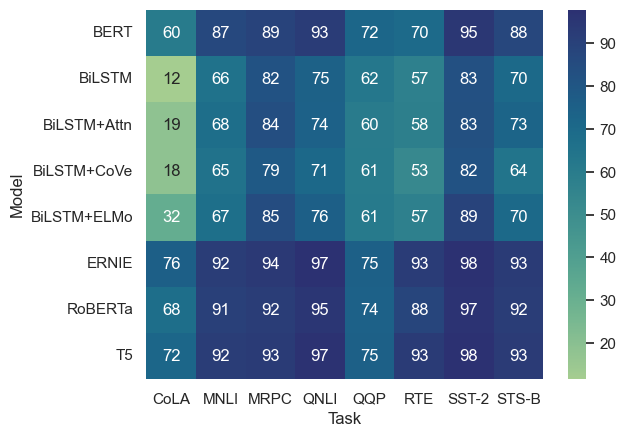

In [21]:
glue = sns.load_dataset('glue').pivot(index='Model', columns='Task', values="Score")
sns.heatmap(glue, annot=True, cmap='crest')
plt.show()

<div class="alert alert-block alert-success">
<b>Uses:</b><br/>
1. Quick and cheap: Algorithm-based heat maps can be used even if you don't have large traffic volumes. They're usually faster and cheaper.<br/>
2. Page design analysis: Heatmaps provide a quick way to analyze which parts of a page are drawing clicks.<br/>
3. Eye tracking: Heatmap analysis can provide insight into the objects that grab the users' attention first. Results are 100% accurate for the sample group.
</div>

<div class="alert alert-block alert-danger">
<b>Limitations:</b><br/>
1. Data accuracy: Data from software algorithms is often less accurate than data from human users.<br/>
2. Categorical data: Heatmaps use color gradients to represent different data values. This can be ineffective for categorical or non-sequential data.<br/>
3. Human visual limitations: Users can have trouble interpreting heatmaps due to human visual limitations.<br/>
4. Incorrect interpretations: Users may read the information too literally and derive incorrect interpretations.<br/>
5. Misunderstanding: Users may not understand what the map is showing them at all.<br/>
6. Difficult task: It is difficult for the human eye to compare the areas of figures.<br/>
7. Draw conclusions: Marketers or business owners may be tempted to draw conclusions only on the basis of heat map data.
</div>